In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

In [2]:
mnist = input_data.read_data_sets("data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [3]:
# hyper parameters
learning_rate = 0.01
training_epochs = 20
batch_size = 100

# dropout (keep_prob) rate  0.7~0.5 on training, but should be 1 for testing
#keep_prob = tf.placeholder(tf.float32)
keep_prob = 0.7
# for batch_normalization
is_train = tf.placeholder(tf.bool)

In [4]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

In [5]:
# L1 ImgIn shape=(?, 28, 28, 1)

conv1 = tf.layers.conv2d(inputs=X_img, filters=32, kernel_size=[3,3], padding='SAME', 
                      activation=tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
conv1 = tf.layers.batch_normalization(inputs=conv1, training=is_train)

pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2,2], padding='SAME', strides=2)
drop1 = tf.layers.dropout(inputs=pool1, rate=keep_prob, training=is_train)

'''
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("dropout/mul:0", shape=(?, 14, 14, 32), dtype=float32)
'''

'\nTensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)\nTensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)\nTensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)\nTensor("dropout/mul:0", shape=(?, 14, 14, 32), dtype=float32)\n'

In [6]:
# L2 ImgIn shape=(?, 14, 14, 32)

conv2 = tf.layers.conv2d(inputs=drop1, filters=64, kernel_size=[3,3], padding='SAME', 
                      activation=tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
conv2 = tf.layers.batch_normalization(inputs=conv2, training=is_train)

pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2,2], padding='SAME', strides=2)
drop2 = tf.layers.dropout(inputs=pool2, rate=keep_prob, training=is_train)


'''
Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("dropout_1/mul:0", shape=(?, 7, 7, 64), dtype=float32)
'''

'\nTensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)\nTensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)\nTensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)\nTensor("dropout_1/mul:0", shape=(?, 7, 7, 64), dtype=float32)\n'

In [7]:
# L3 ImgIn shape=(?, 7, 7, 64)

conv3 = tf.layers.conv2d(inputs=drop2, filters=128, kernel_size=[3,3], padding='SAME', 
                      activation=tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
conv3 = tf.layers.batch_normalization(inputs=conv3, training=is_train)

pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2,2], padding='SAME', strides=2)
drop3 = tf.layers.dropout(inputs=pool3, rate=keep_prob, training=is_train)

flat = tf.reshape(drop3, [-1, 128 * 4 * 4])
'''
Tensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 2048), dtype=float32)
'''

'\nTensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)\nTensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)\nTensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)\nTensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)\nTensor("Reshape_1:0", shape=(?, 2048), dtype=float32)\n'

In [8]:
# L4 FC 4x4x128 inputs -> 625 outputs

dense4 = tf.layers.dense(inputs=flat, units=625, activation=tf.nn.relu, 
                        kernel_initializer=tf.contrib.layers.xavier_initializer())
drop4 = tf.layers.dropout(inputs=dense4, rate=keep_prob, training=is_train)

'''
Tensor("Relu_3:0", shape=(?, 625), dtype=float32)
Tensor("dropout_3/mul:0", shape=(?, 625), dtype=float32)
'''

'\nTensor("Relu_3:0", shape=(?, 625), dtype=float32)\nTensor("dropout_3/mul:0", shape=(?, 625), dtype=float32)\n'

In [9]:
# L5 Final FC 625 inputs -> 10 outputs

logits = tf.layers.dense(inputs=drop4, units=10, kernel_initializer=tf.contrib.layers.xavier_initializer())

'''
Tensor("add_1:0", shape=(?, 10), dtype=float32)
'''

'\nTensor("add_1:0", shape=(?, 10), dtype=float32)\n'

In [10]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [11]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [12]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [13]:
# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    avg_train_acc = 0
    avg_test_acc = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, is_train: True}
        c, acc, _ = sess.run([cost, accuracy, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
        avg_train_acc += acc / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost), 
         'train_acc =', '{:.5f}'.format(avg_train_acc), 
         'test_acc =', '{:.5f}'.format(sess.run(accuracy, feed_dict={
             X: mnist.test.images, Y: mnist.test.labels, is_train: False})))

print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 0001 cost = 1.721303453 train_acc = 0.48135 test_acc = 0.83530
Epoch: 0002 cost = 0.919957837 train_acc = 0.69951 test_acc = 0.92580
Epoch: 0003 cost = 0.676610027 train_acc = 0.79560 test_acc = 0.95550
Epoch: 0004 cost = 0.581776810 train_acc = 0.83165 test_acc = 0.95460
Epoch: 0005 cost = 0.561238487 train_acc = 0.84518 test_acc = 0.95750
Epoch: 0006 cost = 0.537413463 train_acc = 0.85584 test_acc = 0.96060
Epoch: 0007 cost = 0.550118623 train_acc = 0.85620 test_acc = 0.95840
Epoch: 0008 cost = 0.567167271 train_acc = 0.85476 test_acc = 0.96520
Epoch: 0009 cost = 0.557550671 train_acc = 0.86016 test_acc = 0.95240
Epoch: 0010 cost = 0.552943401 train_acc = 0.85967 test_acc = 0.96090
Epoch: 0011 cost = 0.568158102 train_acc = 0.85993 test_acc = 0.97070
Epoch: 0012 cost = 0.564403488 train_acc = 0.86076 test_acc = 0.96860
Epoch: 0013 cost = 0.582016774 train_acc = 0.85765 test_acc = 0.96610
Epoch: 0014 cost = 0.588305782 train_acc = 0.85885 te

In [14]:
# Test model and check accuracy
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, is_train: False}))

Accuracy: 0.9691


Label:  [4]
Prediction:  [4]


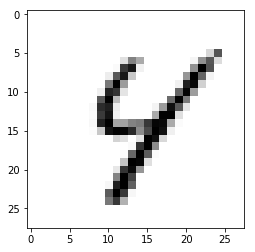

In [15]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1], is_train: False}))

plt.imshow(mnist.test.images[r:r + 1].
           reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()